## EDA- Regresión

### 1. Importamos las librerías necesarias.

In [20]:
# Herramientas para EDA
import pandas as pd
import numpy as np
import sidetable as stb
from datetime import timedelta
from datetime import date, datetime
import random 

# Herramientas para la Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.gridspec import GridSpec

# Estadísticos
import statsmodels.api as sm
from statsmodels.formula.api import ols

plt.rcParams["figure.figsize"] = (16,8)

import warnings
warnings.filterwarnings('ignore')

### 2. Abrimos el archivo con el que vamos a trabajar.

In [10]:
df= pd.read_csv('../archivos/bikes_limpio.csv', index_col=0)
df.head()

,fecha,estacion,año,mes,dias_festivos,dias_laborales,clima,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana,dias_festivos_cat
0,2018-01-01,invierno,0,1,New Year's Day,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1
1,2018-01-02,invierno,0,1,NaN,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,0
2,2018-01-03,invierno,0,1,NaN,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,0
3,2018-01-04,invierno,0,1,NaN,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,0
4,2018-01-05,invierno,0,1,NaN,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,0


### 3. Empezamos la exploración de nuestra base de datos limpia, para empezar a preparar nuestro algoritmo predictivo.

In [11]:
df.shape

(730, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 730 non-null    object 
 1   estacion              730 non-null    object 
 2   año                   730 non-null    int64  
 3   mes                   730 non-null    int64  
 4   dias_festivos         21 non-null     object 
 5   dias_laborales        730 non-null    int64  
 6   clima                 730 non-null    int64  
 7   temperatura           730 non-null    float64
 8   sensacion_termica     730 non-null    float64
 9   humedad               730 non-null    float64
 10  velocidad_viento      730 non-null    float64
 11  clientes_casuales     730 non-null    int64  
 12  clientes_registrados  730 non-null    int64  
 13  total_bicis           730 non-null    int64  
 14  dia_semana            730 non-null    int64  
 15  dias_festivos_cat     7

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
año,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mes,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
dias_laborales,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
clima,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temperatura,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
sensacion_termica,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
humedad,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
velocidad_viento,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
clientes_casuales,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
clientes_registrados,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000


In [14]:
df.describe(include='object').T

,count,unique,top,freq
fecha,730,730,2018-01-01,1
estacion,730,4,verano,188
dias_festivos,21,11,New Year's Day,2


In [17]:
df.stb.missing()

,missing,total,percent
dias_festivos,709,730,97.123288
fecha,0,730,0.000000
estacion,0,730,0.000000
año,0,730,0.000000
mes,0,730,0.000000
dias_laborales,0,730,0.000000
clima,0,730,0.000000
temperatura,0,730,0.000000
sensacion_termica,0,730,0.000000
humedad,0,730,0.000000


3.1 Comprobamos la correlación entre todas nuestras variables.

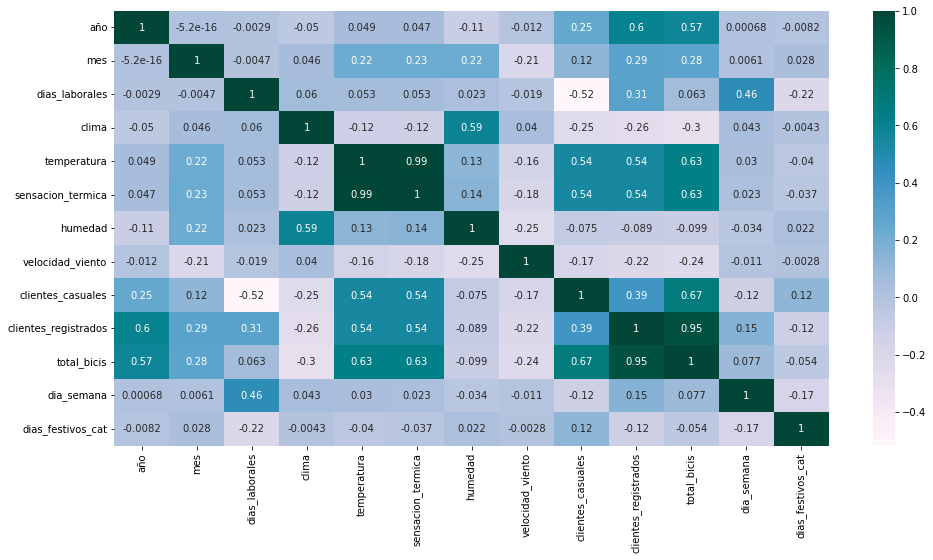

In [15]:
sns.heatmap(df.corr(), cmap= 'PuBuGn', annot= True);

3.2 Comprobamos la normalidad de nuestra variable respuesta.

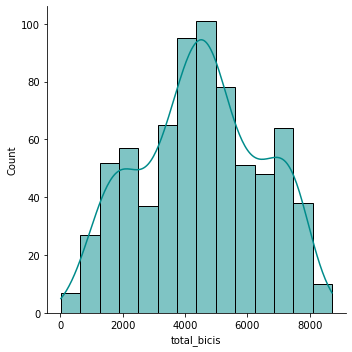

In [19]:
sns.displot(df['total_bicis'], kde = True, color = "darkcyan");

3.3. Realizamos un Anova.

In [21]:
df.columns

Index(['fecha', 'estacion', 'año', 'mes', 'dias_festivos', 'dias_laborales',
       'clima', 'temperatura', 'sensacion_termica', 'humedad',
       'velocidad_viento', 'clientes_casuales', 'clientes_registrados',
       'total_bicis', 'dia_semana', 'dias_festivos_cat'],
      dtype='object')

In [24]:
lm = ols('total_bicis ~ año + mes + clima + temperatura + sensacion_termica + humedad + velocidad_viento + clientes_casuales + clientes_registrados', data = df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
año,1.0,8.869095e+08,8.869095e+08,1.291887e+32,0.0
mes,1.0,2.114606e+08,2.114606e+08,3.080169e+31,0.0
clima,1.0,2.151321e+08,2.151321e+08,3.133649e+31,0.0
temperatura,1.0,7.393780e+08,7.393780e+08,1.076990e+32,0.0
sensacion_termica,1.0,9.293712e+06,9.293712e+06,1.353737e+30,0.0
humedad,1.0,3.457938e+06,3.457938e+06,5.036888e+29,0.0
velocidad_viento,1.0,3.102638e+07,3.102638e+07,4.519353e+30,0.0
clientes_casuales,1.0,1.160012e+08,1.160012e+08,1.689692e+31,0.0
clientes_registrados,1.0,5.197355e+08,5.197355e+08,7.570551e+31,0.0
Residual,720.0,4.942963e-21,6.865227e-24,NaN,NaN


In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_bicis   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.422e+31
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:23:05   Log-Likelihood:                 18437.
No. Observations:                 730   AIC:                        -3.685e+04
Df Residuals:                     720   BIC:                        -3.681e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.809e-12    7.1e-13     -5.362      0.000    -5.2e-12   -2.41e-12
año                   5.258e-13   2.91e-13      1.807      0.071   -4.55e-14     1.1e-12
mes                   4.619e-14   3.14e-14      1.470      0.142   -1.55e-14    1.08e-13
clima                 6.253e-13   2.41e-13      2.595      0.010    1.52e-13     1.1e-12
temperatura           1.421e-13   1.03e-13      1.382      0.167   -5.97e-14    3.44e-13
sensacion_termica    -2.558e-13   9.56e-14     -2.676      0.008   -4.43e-13   -6.82e-14
humedad              -1.243e-14   9.47e-15     -1.312      0.190    -3.1e-14    6.17e-15
velocidad_viento      2.132e-14   2.09e-14      1.020      0.308   -1.97e-14    6.23e-14
clientes_casuales        1.0000   1.83e-16   5.48e+15      0.000       1.000       1.000
clientes_registrados     1.0000   1.15e-16    8.7e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       49.132   Durbin-Watson:                   0.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.601
Skew:                          -0.338   Prob(JB):                     6.16e-07
Kurtosis:                       2.304   Cond. No.                     2.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""